# Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.example_data import load_ecoli_data

# Creating ica_data object

## Annotation tables

### Gene table

In [3]:
gene_table = pd.read_csv("../../data/PRECISE-1K_data_files/gene_info.csv")
gene_table.index = gene_table['Unnamed: 0']
gene_table.rename(columns={"cog":"COG"},inplace=True)
gene_table.drop('Unnamed: 0',axis=1,inplace=True)
gene_table.index.name = None
gene_table.head()

,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,essential,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b0002,thrA,thrA;thrA1;thrA2,fused aspartate kinase/homoserine dehydrogenase 1,Amino acid transport and metabolism,"RpoD,Ile-tRNA,Thr-tRNA,DksA,Fnr,ArcA,ppGpp",P00561,337,2799,+,False,...,False,True,4101.5,4434.0,True,True,10.314562,9.605329,1.042143,True
b0003,thrB,thrB,homoserine kinase,Nucleotide transport and metabolism,"RpoD,Ile-tRNA,Thr-tRNA,DksA,ppGpp",P00547,2801,3733,+,False,...,False,True,442.0,1177.0,True,True,9.982251,9.232803,1.035654,True
b0004,thrC,thrC,threonine synthase,Amino acid transport and metabolism,"RpoD,ppGpp,Ile-tRNA,Thr-tRNA,DksA",P00934,3734,5020,+,False,...,False,True,8818.5,3516.0,True,True,9.973666,9.274271,0.906287,True
b0005,yaaX,yaaX,DUF2502 domain-containing protein YaaX,Function unknown,Lrp,P75616,5234,5530,+,False,...,True,False,NaN,NaN,False,True,7.132482,6.283661,1.093146,True
b0006,yaaA,yaaA,peroxide stress resistance protein YaaA,Function unknown,NaN,P0A8I3,5683,6459,-,False,...,True,True,539.5,333.0,True,True,6.494941,6.346626,0.454519,True


### Sample table

In [4]:
sample_table = pd.read_csv("../../data/PRECISE-1K_data_files/sample_table.csv")
sample_table.index = sample_table['sample']
sample_table.drop('Unnamed: 0',axis=1,inplace=True)
sample_table.drop('sample',axis=1,inplace=True)
sample_table.index.name = "Sample ID"
sample_table.head()

,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,Temperature (C),...,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates
Sample ID,,,,,,,,,,,,,,,,,,,,,
control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2
control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10-02-2013,2
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10-02-2013,2
fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,37,...,Sangwoo Seo,True,True,True,True,fur:wt_fe,True,True,09-05-2013,2


### iM table

In [5]:
# imodulon_table = pd.read_csv("../../../_data/ica_data/p1k_data_files/iM_table.csv")
# imodulon_table.index = imodulon_table['name']
# imodulon_table.drop('k',axis=1,inplace=True)
# imodulon_table.head()

imodulon_table = pd.read_csv("../../data/PRECISE-1K_data_files/imodulon_table.csv", index_col=0)
imodulon_table.index.name = 'name'
imodulon_table.head()

,exp_var,imodulon_size,enrichment_category,system_category,functional_category,function,regulator,n_regs,pvalue,qvalue,...,single_gene_dominant_technical,tcs,regulon_discovery,ko,PRECISE 2.0,PRECISE 2.0_pearson,PRECISE 2.0_spearman,PRECISE,PRECISE_pearson,PRECISE_spearman
name,,,,,,,,,,,,,,,,,,,,,
Sugar Diacid,0.002413,14,Regulatory,Metabolism,Carbon Metabolism,Transport and catabolism of carbohydrate diaci...,CdaR,1.0,1.595767e-24,7.110896e-20,...,False,False,False,False,CdaR,0.952054,0.758726,CdaR,0.905552,0.562704
Translation,0.007469,53,Regulatory,Translation,Translation,Ribosome biogenesis,DksA,1.0,7.972755e-65,5.125923e-60,...,False,False,False,False,Translation,0.892858,0.764432,translation,0.667232,0.482602
ygdT,0.000344,3,Technical,Single Gene,Unknown,Unknown,NaN,NaN,NaN,NaN,...,True,False,False,False,SG_ygdT,0.653472,0.422661,NaN,NaN,NaN
OxyR,0.001747,38,Regulatory,Stress Responses,Redox Stress,"Oxidative stress response, especially peroxide",OxyR,1.0,2.620144e-27,4.708660e-23,...,False,False,False,False,OxyR,0.926352,0.730520,OxyR,0.621129,0.254705
FlhDC-2,0.030021,43,Regulatory,Stress Responses,Extracellular Structures,Flagellum biosynthesis and export,FlhDC,1.0,7.733764e-62,3.447790e-57,...,False,False,False,False,FlhDC-2,0.917180,0.439455,FlhDC,0.907624,0.310641


## M

In [6]:
M = pd.read_csv("../../data/PRECISE-1K_data_files/M.csv",)
M.index = M['Unnamed: 0']
M.drop('Unnamed: 0',axis=1,inplace=True)
M.index.name = None

M.columns = list(imodulon_table.index)
M

,Sugar Diacid,Translation,ygdT,OxyR,FlhDC-2,Osmoprotectant,Glutamine,Sialic Acid,yqhI,ROS TALE Amp,...,Tryptophanase,crp KO-2,cyoB/ndh/nuoB KO-2,tpiA KO,Phage Shock,Glyoxylate,CCK-PGI Del,Acetate,Ile/Val,UC-8
b0002,-0.005367,-0.002423,0.010140,-0.001362,-0.017297,0.008631,-0.006491,0.092469,-0.010978,-0.003400,...,-0.012070,-0.008812,0.004996,0.008216,-0.002720,0.007874,-0.004350,-0.013319,0.009296,0.000891
b0003,0.006212,-0.001901,0.007207,0.000073,-0.004829,-0.003186,-0.011677,0.082103,0.011074,-0.004679,...,0.006683,-0.017798,0.000964,0.003273,0.010018,0.002132,-0.005826,-0.010836,-0.066654,-0.003513
b0004,0.010600,-0.002205,0.004961,-0.002289,-0.004938,-0.005587,-0.008127,0.080888,0.007511,0.003887,...,0.008132,-0.018105,-0.007763,0.009103,-0.002566,-0.007120,-0.005676,-0.002164,-0.060155,-0.007025
b0005,0.011520,0.008573,0.020449,-0.003123,0.002009,-0.026382,-0.016374,0.022484,0.007903,0.017561,...,-0.000139,0.001437,0.001827,-0.008113,0.065835,-0.019238,-0.001622,-0.009303,-0.069669,-0.004241
b0006,0.003482,-0.002293,-0.010146,0.140794,-0.001754,0.000974,0.023500,-0.017665,0.006247,-0.005761,...,0.017025,0.005473,-0.002252,0.002807,-0.030303,0.000805,0.028367,0.018293,-0.018444,-0.033624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,-0.003644,0.018245,-0.003134,0.004992,-0.000873,-0.021262,-0.012556,0.036707,-0.062935,0.016316,...,0.002969,-0.012892,0.024815,-0.000077,-0.004676,0.015222,0.011431,0.013733,0.011955,0.001203
b4748,0.010023,-0.030343,-0.000578,-0.002526,-0.000906,0.000805,0.007411,-0.021330,-0.013622,-0.034542,...,0.004057,-0.001059,-0.007595,0.002024,0.001573,-0.029301,-0.007873,0.021424,-0.001528,-0.000353
b4751,0.001082,0.013560,0.010030,-0.022409,0.006737,-0.012387,-0.002341,-0.010584,-0.015837,0.003776,...,-0.005873,-0.000560,0.008653,0.005759,0.029820,-0.004053,0.026769,0.020823,0.000414,-0.001453
b4755,-0.002204,-0.006527,0.003732,-0.000946,-0.009858,0.010553,-0.022747,0.003496,0.530162,0.000412,...,0.024388,0.003566,0.004696,-0.003552,0.002161,0.000556,-0.005656,0.021056,0.008180,0.021366


## Thresholds

In [7]:
thresholds = pd.read_csv("../../data/PRECISE-1K_data_files/M_thresholds.csv")
thresholds.index = list(imodulon_table.index)
thresholds = thresholds.drop("Unnamed: 0", axis=1)
thresholds = thresholds["0"].to_dict()
# thresholds

## A and sample table

In [8]:
A = pd.read_csv("../../data/PRECISE-1K_data_files/A.csv",)
A.index = A['Unnamed: 0']
A.drop('Unnamed: 0',axis=1,inplace=True)
A.index.name = None

A.columns = list(sample_table.index)
A.index = list(imodulon_table.index)
A

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,DDB3__PD-006_del-rpoS_Batch_9h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__1,DDB3__PD-006_del-rpoS_Fed-batch_6h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__3,DDB3__PD-006_del-rpoS_Fed-batch_15h__1,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__2
Sugar Diacid,0.048851,-0.048851,2.226245,2.238391,0.222740,0.383348,1.534940,1.480178,0.536021,0.167563,...,0.605951,3.969272,3.960774,3.431303,3.198403,3.865406,1.095074,2.575524,1.850326,2.035736
Translation,0.201055,-0.201055,-8.162122,-8.046208,1.633678,1.973262,-8.058080,-6.272859,-1.536470,-1.828831,...,2.416670,-1.187724,-1.626310,-1.492168,-0.436511,-1.004710,5.258995,-1.782148,-4.601815,-5.110518
ygdT,-0.382475,0.382475,0.066040,-0.898701,-0.556961,-1.523642,0.039413,0.002855,0.256867,-1.890067,...,-1.885401,0.689130,1.997418,2.177559,1.459224,-3.110064,4.336594,0.626609,-0.166365,0.539555
OxyR,0.130714,-0.130714,0.232581,-0.135165,-0.140487,-0.435341,-0.788937,-1.333850,0.255054,0.464381,...,-2.743285,-2.888544,-2.341820,-2.498864,-2.931448,-2.693465,-1.690293,-3.056924,-3.575826,-2.316941
FlhDC-2,-0.329000,0.329000,-5.319409,-5.196873,-7.144849,-6.758991,-5.930140,-5.934485,-1.775148,-3.070194,...,4.303118,1.626655,2.701441,1.840211,2.703303,1.862170,10.399505,-4.285524,2.349262,3.101853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glyoxylate,0.344877,-0.344877,5.450515,5.444039,-0.641401,-0.472477,5.557743,5.070821,0.423674,0.559522,...,1.180854,2.036347,2.514846,2.469912,2.064530,2.645660,0.830452,4.243346,2.047711,2.828812
CCK-PGI Del,0.077106,-0.077106,-0.260639,0.163570,1.030188,1.220775,-0.049178,0.392918,1.611484,1.699807,...,-0.360018,0.689914,1.350155,0.510417,1.075789,2.065799,-2.090274,0.143198,-0.551313,0.908994
Acetate,0.575197,-0.575197,-2.476044,-2.875184,-0.756414,-0.251539,-1.737154,-1.652438,-1.304588,-1.319442,...,1.637433,5.259582,6.259438,5.784253,4.928517,4.221586,0.574095,12.177624,12.558275,12.767103
Ile/Val,0.226627,-0.226627,1.699217,1.678226,-1.167426,-0.618004,2.100661,2.068120,-1.050492,-1.504338,...,0.388348,-1.066533,-0.469043,-1.736812,-0.701636,-0.657140,1.027797,-2.860252,-1.283872,-1.949882


## X

In [9]:
X = pd.read_csv("../../data/PRECISE-1K_data_files/log_tpm.csv")
X.index = X['Unnamed: 0']
X.drop('Unnamed: 0',axis=1,inplace=True)
X.index.name = None
X.columns = list(sample_table.index)
X

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,DDB3__PD-006_del-rpoS_Batch_9h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__1,DDB3__PD-006_del-rpoS_Fed-batch_6h__2,DDB3__PD-006_del-rpoS_Fed-batch_6h__3,DDB3__PD-006_del-rpoS_Fed-batch_15h__1,DDB3__PD-006_del-rpoS_Fed-batch_15h__2,DDB3__PD-009_del-tnaA_Batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_6h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__1,DDB3__PD-009_del-tnaA_Fed-batch_15h__2
b0002,-0.053993,0.053993,0.879043,1.089600,0.182453,-0.078873,-0.837092,-0.502703,0.421312,0.412354,...,-0.868029,-2.012060,-1.862453,-1.950586,-1.642161,-1.666869,-0.639387,-1.552748,-1.892598,-1.831359
b0003,-0.061973,0.061973,1.063330,1.477889,0.392573,0.234671,-0.763015,-0.120989,0.546181,0.520841,...,-1.501588,-2.532496,-2.515189,-2.443481,-2.258418,-2.312108,-1.124294,-2.060022,-2.348524,-2.122772
b0004,-0.036972,0.036972,0.003132,0.356702,-0.096756,-0.334913,-1.714913,-1.322707,-0.234147,-0.250669,...,-0.691635,-1.692102,-1.608955,-1.723764,-1.376420,-1.251488,-0.529185,-1.577833,-1.383521,-1.527079
b0005,-0.104967,0.104967,-1.118145,-1.277963,-0.181546,-0.364057,-2.121475,-1.994770,-0.386684,-0.634659,...,-2.925632,-4.626965,-4.067417,-2.964371,-3.075562,-3.101967,-2.210546,-3.821019,-4.563928,-2.946659
b0006,0.042242,-0.042242,-0.123592,-0.107778,-0.173177,-0.089888,-0.208133,-0.003044,-0.034707,-0.027806,...,0.190536,-0.618740,-0.175381,-0.317349,-0.466331,-0.169979,-0.402588,-0.915991,-0.804728,-0.858978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,0.619141,-0.619141,-0.619141,-0.619141,0.202715,-0.619141,0.734510,-0.619141,0.790289,0.284033,...,-0.619141,0.766947,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,-0.619141,1.164489
b4748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.421363,0.000000,0.000000,0.000000,...,5.441998,5.734377,5.614587,5.648036,5.957326,6.657140,3.672372,4.138619,5.809142,4.465101
b4751,-0.039552,0.039552,-1.290021,-1.298327,-0.481621,-0.609865,-1.680827,-1.239934,-0.134430,-0.363082,...,0.274369,-0.356653,-0.371515,-0.064824,-0.504051,0.323457,-1.267812,-0.534742,0.039449,-0.051373
b4755,-0.235166,0.235166,2.621649,3.256277,-0.302443,-0.096198,2.518406,3.268205,1.379971,0.910647,...,-0.633352,-0.039091,-0.136657,0.734843,1.699093,-2.399592,-2.399592,3.413940,1.914515,1.564518


## TRN

In [10]:
trn = pd.read_csv("../../data/PRECISE-1K_data_files/trn.csv")
trn.drop('Unnamed: 0',axis=1,inplace=True)
trn.head()

,regulator,gene_name,gene_id,effect,evidence,source
0,AccB,accB,b3255,-,0.0,RegulonDB_TF
1,RpoD,pheP,b0576,+,0.0,RegulonDB_sigma
2,RpoD,pheA,b2599,+,0.0,RegulonDB_sigma
3,RpoD,pgpB,b1278,+,0.0,RegulonDB_sigma
4,RpoD,pgpA,b0418,+,0.0,RegulonDB_sigma


## Creating ica_data

In [11]:
ica_data = IcaData(
    M = M,
    A = A, 
    X = X,
    gene_table = gene_table,
    sample_table = sample_table,
    imodulon_table = imodulon_table,
    trn = trn,
    thresholds = thresholds,                  
)

## Saving ica_data

In [12]:
from pymodulon.io import *
from os import path

In [13]:
save_to_json(ica_data,"../../data/ica_data/ecoli_p1k.json")

# Loading exisitng ica_data

In [14]:
ica_data = load_json_model("../../data/ica_data/ecoli_p1k.json")

# Adding oxygen scale-down data

## Loading uncentered log_tpm

In [15]:
ddb_log_tpm = pd.read_csv("../../data/processed_RNA-seq_data/log_tpm.csv")
ddb_log_tpm.index = ddb_log_tpm['Geneid']
ddb_log_tpm.drop('Geneid',axis=1,inplace=True)
ddb_log_tpm.index.name = None
ddb_log_tpm

,PD_131_R10_S1_1,PD_131_R10_S2_1,PD_131_R11_S1_1,PD_131_R11_S2_1,PD_131_R12_S1_1,PD_131_R12_S2_1,PD_131_R13_S1_1,PD_131_R13_S2_1,PD_131_R14_S1_1,PD_131_R15_S1_1,PD_131_R16_S1_1,PD_131_R5_S1_1,PD_131_R6_S1_1,PD_131_R7_S1_1,PD_131_R8_S1_1,PD_131_R8_S2_1,PD_131_R9_S1_1,PD_131_R9_S2_1
b0001,10.542071,10.524913,6.857832,6.906026,7.443168,6.222593,6.562538,6.132769,8.685035,10.323596,9.744801,10.454482,10.961873,10.434192,10.221538,9.691769,11.011117,9.842718
b0002,6.983476,6.571052,7.292860,7.389042,7.505922,7.447071,7.485142,7.472657,5.673380,10.944132,8.814414,6.305649,6.161097,6.195539,6.842824,6.691695,6.904192,6.912470
b0003,6.279387,7.662864,6.965879,7.184362,7.274294,7.027987,6.999492,7.137968,6.797405,10.051119,8.519854,6.449948,6.466657,6.496632,5.963528,7.843477,6.046817,7.946063
b0004,6.114676,7.631414,6.980479,7.101836,7.120167,7.007432,7.047836,7.111750,5.485923,9.567757,7.555921,6.171899,6.092189,6.048485,5.933726,7.815431,6.042058,7.986341
b0005,3.766329,3.760216,3.809159,3.996344,4.185988,3.633578,3.630016,4.117914,4.478287,5.279205,5.193783,3.639005,3.912071,3.554808,3.841613,4.159566,3.827429,4.334063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4399,4.148453,3.902099,3.143706,3.282448,3.137995,3.665043,3.126755,3.476072,3.546637,3.511177,3.461047,4.338955,4.210098,4.157100,4.028715,3.879082,3.863476,4.016300
b4400,4.687163,4.943866,3.684072,3.959599,3.884705,3.825583,3.897530,3.791127,3.410435,3.868458,3.936520,4.909979,4.849761,5.043051,4.947025,4.991526,4.905311,4.755866
b4401,9.751545,9.887230,10.863338,10.735964,10.713577,10.773760,10.951678,10.906079,9.089306,9.163241,9.185704,9.825588,9.744755,9.710376,9.674630,9.993849,9.719481,10.093622
b4402,4.588682,4.639081,7.715643,7.909770,7.812447,7.857727,7.092695,7.593757,7.273793,6.797145,7.185419,4.353471,4.099892,3.945979,4.756816,3.858394,4.744738,4.577753


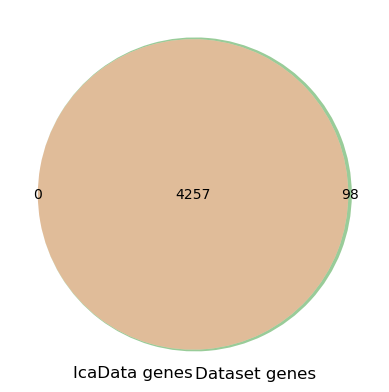

In [16]:
from matplotlib_venn import venn2
venn2((set(ica_data.gene_names),set(ddb_log_tpm.index)), set_labels=['IcaData genes','Dataset genes'])

## Loading and adding p1k log_tpm (uncentered)

In [17]:
log_tpm_p1k_ref = pd.read_csv("../../data/PRECISE-1K_data_files/p1k_average_reference_log_tpm.csv")
log_tpm_p1k_ref.rename(columns={"geneid":"Geneid"},inplace=True)
log_tpm_p1k_ref.index = log_tpm_p1k_ref['Geneid']
log_tpm_p1k_ref.drop('Geneid',axis=1,inplace=True)
log_tpm_p1k_ref

,Reference
Geneid,
b0001,10.372833
b0002,10.314562
b0003,9.982251
b0004,9.973666
b0005,7.132482
...,...
b4753,2.577658
b4754,3.153057
b4755,2.399592


In [18]:
ddb_combined_log_tpm = pd.concat([log_tpm_p1k_ref,ddb_log_tpm],axis=1)
ddb_combined_log_tpm.head()

,Reference,PD_131_R10_S1_1,PD_131_R10_S2_1,PD_131_R11_S1_1,PD_131_R11_S2_1,PD_131_R12_S1_1,PD_131_R12_S2_1,PD_131_R13_S1_1,PD_131_R13_S2_1,PD_131_R14_S1_1,PD_131_R15_S1_1,PD_131_R16_S1_1,PD_131_R5_S1_1,PD_131_R6_S1_1,PD_131_R7_S1_1,PD_131_R8_S1_1,PD_131_R8_S2_1,PD_131_R9_S1_1,PD_131_R9_S2_1
b0001,10.372833,10.542071,10.524913,6.857832,6.906026,7.443168,6.222593,6.562538,6.132769,8.685035,10.323596,9.744801,10.454482,10.961873,10.434192,10.221538,9.691769,11.011117,9.842718
b0002,10.314562,6.983476,6.571052,7.292860,7.389042,7.505922,7.447071,7.485142,7.472657,5.673380,10.944132,8.814414,6.305649,6.161097,6.195539,6.842824,6.691695,6.904192,6.912470
b0003,9.982251,6.279387,7.662864,6.965879,7.184362,7.274294,7.027987,6.999492,7.137968,6.797405,10.051119,8.519854,6.449948,6.466657,6.496632,5.963528,7.843477,6.046817,7.946063
b0004,9.973666,6.114676,7.631414,6.980479,7.101836,7.120167,7.007432,7.047836,7.111750,5.485923,9.567757,7.555921,6.171899,6.092189,6.048485,5.933726,7.815431,6.042058,7.986341
b0005,7.132482,3.766329,3.760216,3.809159,3.996344,4.185988,3.633578,3.630016,4.117914,4.478287,5.279205,5.193783,3.639005,3.912071,3.554808,3.841613,4.159566,3.827429,4.334063


## Centering DDB log_tpm to p1k reference

In [19]:
ddb_centered_log_tpm = ddb_combined_log_tpm.sub(ddb_combined_log_tpm['Reference'],axis=0)
# dropping reference column, as it is already in p1k
ddb_centered_log_tpm.drop('Reference',axis=1,inplace=True)
ddb_centered_log_tpm

,PD_131_R10_S1_1,PD_131_R10_S2_1,PD_131_R11_S1_1,PD_131_R11_S2_1,PD_131_R12_S1_1,PD_131_R12_S2_1,PD_131_R13_S1_1,PD_131_R13_S2_1,PD_131_R14_S1_1,PD_131_R15_S1_1,PD_131_R16_S1_1,PD_131_R5_S1_1,PD_131_R6_S1_1,PD_131_R7_S1_1,PD_131_R8_S1_1,PD_131_R8_S2_1,PD_131_R9_S1_1,PD_131_R9_S2_1
b0001,0.169237,0.152080,-3.515001,-3.466807,-2.929665,-4.150240,-3.810295,-4.240064,-1.687799,-0.049237,-0.628033,0.081649,0.589040,0.061359,-0.151296,-0.681064,0.638284,-0.530116
b0002,-3.331087,-3.743510,-3.021702,-2.925520,-2.808640,-2.867491,-2.829420,-2.841905,-4.641183,0.629570,-1.500149,-4.008913,-4.153465,-4.119023,-3.471739,-3.622868,-3.410370,-3.402092
b0003,-3.702863,-2.319386,-3.016371,-2.797889,-2.707956,-2.954263,-2.982759,-2.844283,-3.184845,0.068869,-1.462396,-3.532302,-3.515594,-3.485619,-4.018722,-2.138774,-3.935433,-2.036187
b0004,-3.858991,-2.342252,-2.993188,-2.871831,-2.853499,-2.966234,-2.925830,-2.861916,-4.487743,-0.405909,-2.417745,-3.801767,-3.881477,-3.925181,-4.039940,-2.158235,-3.931608,-1.987326
b0005,-3.366153,-3.372265,-3.323323,-3.136138,-2.946494,-3.498904,-3.502465,-3.014567,-2.654195,-1.853277,-1.938699,-3.493477,-3.220411,-3.577674,-3.290869,-2.972916,-3.305053,-2.798419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4753,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-2.577658,-1.350056,-2.577658,-2.577658,-2.577658
b4754,-3.153057,-2.112865,-3.153057,-1.686778,-3.153057,-3.153057,-3.153057,-1.691980,-0.665425,-3.153057,-3.153057,-3.153057,-3.153057,-1.428864,-0.999163,-3.153057,-3.153057,-2.062476
b4755,-0.497652,-0.370506,-2.399592,-2.399592,-2.399592,-2.399592,-2.399592,-1.383334,-0.918179,-1.527662,-0.930075,-0.829445,0.248927,0.112359,-1.171990,-1.637509,-0.110302,-0.091116
b4756,1.535218,1.130239,3.803874,3.643397,3.325929,3.608479,3.407310,3.667796,3.220749,2.797782,3.359817,1.460656,1.686234,1.917622,1.842396,1.078127,1.854124,0.979308


## Inferring iM activities for DDB (p1k centered)

In [20]:
from pymodulon.util import infer_activities

In [21]:
ddb_activities = infer_activities(ica_data,ddb_centered_log_tpm)
ddb_activities.head()

C:\Users\jonas\anaconda3\lib\site-packages\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,PD_131_R10_S1_1,PD_131_R10_S2_1,PD_131_R11_S1_1,PD_131_R11_S2_1,PD_131_R12_S1_1,PD_131_R12_S2_1,PD_131_R13_S1_1,PD_131_R13_S2_1,PD_131_R14_S1_1,PD_131_R15_S1_1,PD_131_R16_S1_1,PD_131_R5_S1_1,PD_131_R6_S1_1,PD_131_R7_S1_1,PD_131_R8_S1_1,PD_131_R8_S2_1,PD_131_R9_S1_1,PD_131_R9_S2_1
Sugar Diacid,2.043038,2.637888,3.598686,3.767014,3.932734,3.741617,4.130152,4.003558,0.793859,1.837498,1.272597,2.141538,1.915231,1.961269,1.946485,2.757580,1.666879,2.715594
Translation,-15.543404,-8.431506,-29.985711,-30.817074,-29.717599,-29.783993,-30.350718,-30.208597,-16.117766,-15.588262,-18.203370,-12.642261,-13.633077,-12.804443,-15.501619,-8.143771,-16.078709,-8.496968
ygdT,0.027450,-0.563424,-0.720984,-0.622835,-1.450540,-0.479488,-0.883817,-0.648192,0.383298,1.241662,1.376895,-0.103736,-0.906568,-0.454368,0.352278,-1.832487,-0.349587,-1.514220
OxyR,-0.929736,-2.571670,-1.724537,-2.141187,-2.160711,-1.853193,-2.082643,-1.737983,-0.267078,0.019379,0.294282,-2.004944,-2.023491,-2.151023,-1.423416,-2.571303,-1.319225,-2.357128
FlhDC-2,-2.734076,-3.268242,-5.298566,-5.331983,-5.016532,-4.101336,-5.137938,-5.015187,-7.402990,-7.769030,-7.224258,-2.920577,-2.286278,-2.918834,-3.275690,-3.370516,-3.127745,-3.688834


In [22]:
# sample table for ddb_sd
ddb_sd_sample_table = pd.read_csv("../../data/processed_RNA-seq_data/metadata.tsv", sep='\t', index_col=0)
ddb_sd_sample_table.head()

,LibraryLayout,Platform,Run,R1,R2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,project,condition,strain_ID,oscillation,sample_ID,experiment_run,strain_name,reference_condition,Unnamed: 17,skip,full_name,passed_replicate_correlations
PD_131_R10_S1_1,PAIRED,DNBSEQ,NaN,PD_131_R10_S1_1.fq.gz,PD_131_R10_S1_2.fq.gz,True,True,True,DDB_SD_2,WT_fed-batch_S_oscillation_feast,DDB35,S,S1,DDB_PD_131_AMBR,WT,WT_fed-batch_control,NaN,NaN,DDB_SD_2:WT_fed-batch_S_oscillation_feast,True
PD_131_R10_S2_1,PAIRED,DNBSEQ,NaN,PD_131_R10_S2_1.fq.gz,PD_131_R10_S2_2.fq.gz,True,True,True,DDB_SD_2,WT_fed-batch_S_oscillation_famine,DDB35,S,S2,DDB_PD_131_AMBR,WT,WT_fed-batch_control,NaN,NaN,DDB_SD_2:WT_fed-batch_S_oscillation_famine,True
PD_131_R11_S1_1,PAIRED,DNBSEQ,NaN,PD_131_R11_S1_1.fq.gz,PD_131_R11_S1_2.fq.gz,True,True,True,DDB_SD_2,WT_fed-batch_O_oscillation_limitation,DDB35,O,S1,DDB_PD_131_AMBR,WT,WT_fed-batch_control,NaN,NaN,DDB_SD_2:WT_fed-batch_O_oscillation_limitation,True
PD_131_R11_S2_1,PAIRED,DNBSEQ,NaN,PD_131_R11_S2_1.fq.gz,PD_131_R11_S2_2.fq.gz,True,True,True,DDB_SD_2,WT_fed-batch_O_oscillation_excess,DDB35,O,S2,DDB_PD_131_AMBR,WT,WT_fed-batch_control,NaN,NaN,DDB_SD_2:WT_fed-batch_O_oscillation_excess,True
PD_131_R12_S1_1,PAIRED,DNBSEQ,NaN,PD_131_R12_S1_1.fq.gz,PD_131_R12_S1_2.fq.gz,True,True,True,DDB_SD_2,WT_fed-batch_O_oscillation_limitation,DDB35,O,S1,DDB_PD_131_AMBR,WT,WT_fed-batch_control,NaN,NaN,DDB_SD_2:WT_fed-batch_O_oscillation_limitation,True


## Combining activities and sample tables with p1k

In [23]:
new_activities = pd.concat([ica_data.A,ddb_activities],axis=1)
new_activities.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,PD_131_R14_S1_1,PD_131_R15_S1_1,PD_131_R16_S1_1,PD_131_R5_S1_1,PD_131_R6_S1_1,PD_131_R7_S1_1,PD_131_R8_S1_1,PD_131_R8_S2_1,PD_131_R9_S1_1,PD_131_R9_S2_1
Sugar Diacid,0.048851,-0.048851,2.226245,2.238391,0.222740,0.383348,1.534940,1.480178,0.536021,0.167563,...,0.793859,1.837498,1.272597,2.141538,1.915231,1.961269,1.946485,2.757580,1.666879,2.715594
Translation,0.201055,-0.201055,-8.162122,-8.046208,1.633678,1.973262,-8.058080,-6.272859,-1.536470,-1.828831,...,-16.117766,-15.588262,-18.203370,-12.642261,-13.633077,-12.804443,-15.501619,-8.143771,-16.078709,-8.496968
ygdT,-0.382475,0.382475,0.066040,-0.898701,-0.556961,-1.523642,0.039413,0.002855,0.256867,-1.890067,...,0.383298,1.241662,1.376895,-0.103736,-0.906568,-0.454368,0.352278,-1.832487,-0.349587,-1.514220
OxyR,0.130714,-0.130714,0.232581,-0.135165,-0.140487,-0.435341,-0.788937,-1.333850,0.255054,0.464381,...,-0.267078,0.019379,0.294282,-2.004944,-2.023491,-2.151023,-1.423416,-2.571303,-1.319225,-2.357128
FlhDC-2,-0.329000,0.329000,-5.319409,-5.196873,-7.144849,-6.758991,-5.930140,-5.934485,-1.775148,-3.070194,...,-7.402990,-7.769030,-7.224258,-2.920577,-2.286278,-2.918834,-3.275690,-3.370516,-3.127745,-3.688834


In [24]:
log_tpm_combined = pd.concat([ica_data.X,ddb_centered_log_tpm],axis=1)
log_tpm_combined.head()

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,PD_131_R14_S1_1,PD_131_R15_S1_1,PD_131_R16_S1_1,PD_131_R5_S1_1,PD_131_R6_S1_1,PD_131_R7_S1_1,PD_131_R8_S1_1,PD_131_R8_S2_1,PD_131_R9_S1_1,PD_131_R9_S2_1
b0002,-0.053993,0.053993,0.879043,1.089600,0.182453,-0.078873,-0.837092,-0.502703,0.421312,0.412354,...,-4.641183,0.629570,-1.500149,-4.008913,-4.153465,-4.119023,-3.471739,-3.622868,-3.410370,-3.402092
b0003,-0.061973,0.061973,1.063330,1.477889,0.392573,0.234671,-0.763015,-0.120989,0.546181,0.520841,...,-3.184845,0.068869,-1.462396,-3.532302,-3.515594,-3.485619,-4.018722,-2.138774,-3.935433,-2.036187
b0004,-0.036972,0.036972,0.003132,0.356702,-0.096756,-0.334913,-1.714913,-1.322707,-0.234147,-0.250669,...,-4.487743,-0.405909,-2.417745,-3.801767,-3.881477,-3.925181,-4.039940,-2.158235,-3.931608,-1.987326
b0005,-0.104967,0.104967,-1.118145,-1.277963,-0.181546,-0.364057,-2.121475,-1.994770,-0.386684,-0.634659,...,-2.654195,-1.853277,-1.938699,-3.493477,-3.220411,-3.577674,-3.290869,-2.972916,-3.305053,-2.798419
b0006,0.042242,-0.042242,-0.123592,-0.107778,-0.173177,-0.089888,-0.208133,-0.003044,-0.034707,-0.027806,...,-1.593014,-2.092125,-1.817294,-0.822467,-1.157402,-0.852717,-0.049287,-2.050985,-0.187815,-1.720015


In [25]:
new_sample_table = pd.concat([ica_data.sample_table,ddb_sd_sample_table],axis=0)

# Self centering DDB

## Centering DDB log_tpm to DDB reference

In [26]:
ddb_self_centered_log_tpm = pd.read_csv("../../data/processed_RNA-seq_data/log_tpm_norm.csv")
ddb_self_centered_log_tpm.index = ddb_self_centered_log_tpm['Geneid']
ddb_self_centered_log_tpm.drop('Geneid',axis=1,inplace=True)
ddb_self_centered_log_tpm.index.name = None
ddb_self_centered_log_tpm

,PD_131_R10_S1_1,PD_131_R10_S2_1,PD_131_R11_S1_1,PD_131_R11_S2_1,PD_131_R12_S1_1,PD_131_R12_S2_1,PD_131_R13_S1_1,PD_131_R13_S2_1,PD_131_R14_S1_1,PD_131_R15_S1_1,PD_131_R16_S1_1,PD_131_R5_S1_1,PD_131_R6_S1_1,PD_131_R7_S1_1,PD_131_R8_S1_1,PD_131_R8_S2_1,PD_131_R9_S1_1,PD_131_R9_S2_1
b0001,-0.074779,-0.091936,-3.759017,-3.710823,-3.173681,-4.394256,-4.054311,-4.484080,-1.931815,-0.293253,-0.872049,-0.162368,0.345024,-0.182657,-0.395312,-0.925080,0.394268,-0.774132
b0002,0.762714,0.350290,1.072098,1.168280,1.285160,1.226309,1.264380,1.251895,-0.547382,4.723371,2.593652,0.084887,-0.059664,-0.025223,0.622062,0.470933,0.683430,0.691708
b0003,-0.191692,1.191785,0.494800,0.713283,0.803216,0.556908,0.528413,0.666889,0.326326,3.580041,2.048775,-0.021131,-0.004422,0.025553,-0.507551,1.372398,-0.424262,1.474984
b0004,0.010485,1.527223,0.876288,0.997645,1.015976,0.903241,0.943645,1.007559,-0.618268,3.463566,1.451730,0.067708,-0.012002,-0.055706,-0.170465,1.711240,-0.062133,1.882150
b0005,0.064368,0.058255,0.107197,0.294383,0.484026,-0.068384,-0.071945,0.415953,0.776326,1.577244,1.491821,-0.062956,0.210109,-0.147153,0.139652,0.457605,0.125467,0.632102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4399,-0.086931,-0.333285,-1.091678,-0.952937,-1.097390,-0.570342,-1.108629,-0.759312,-0.688748,-0.724207,-0.774337,0.103571,-0.025286,-0.078284,-0.206670,-0.356302,-0.371908,-0.219084
b4400,-0.247101,0.009602,-1.250192,-0.974665,-1.049559,-1.108681,-1.036734,-1.143137,-1.523829,-1.065805,-0.997744,-0.024285,-0.084502,0.108787,0.012761,0.057263,-0.028952,-0.178397
b4401,-0.008695,0.126991,1.103098,0.975725,0.953338,1.013520,1.191438,1.145840,-0.670934,-0.596999,-0.574536,0.065348,-0.015484,-0.049864,-0.085610,0.233609,-0.040759,0.333383
b4402,0.455568,0.505967,3.582528,3.776655,3.679333,3.724613,2.959580,3.460643,3.140678,2.664031,3.052305,0.220357,-0.033222,-0.187135,0.623702,-0.274720,0.611624,0.444639


## Inferring iM activities for DDB (self centered)

In [27]:
from pymodulon.util import infer_activities

In [28]:
ddb_activities_self_centered = infer_activities(ica_data,ddb_self_centered_log_tpm)
ddb_activities_self_centered.head()

C:\Users\jonas\anaconda3\lib\site-packages\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,PD_131_R10_S1_1,PD_131_R10_S2_1,PD_131_R11_S1_1,PD_131_R11_S2_1,PD_131_R12_S1_1,PD_131_R12_S2_1,PD_131_R13_S1_1,PD_131_R13_S2_1,PD_131_R14_S1_1,PD_131_R15_S1_1,PD_131_R16_S1_1,PD_131_R5_S1_1,PD_131_R6_S1_1,PD_131_R7_S1_1,PD_131_R8_S1_1,PD_131_R8_S2_1,PD_131_R9_S1_1,PD_131_R9_S2_1
Sugar Diacid,0.037025,0.631875,1.592673,1.761001,1.926721,1.735604,2.124139,1.997545,-1.212154,-0.168515,-0.733416,0.135525,-0.090782,-0.044744,-0.059527,0.751567,-0.339134,0.709581
Translation,-2.516811,4.595087,-16.959118,-17.790480,-16.691006,-16.757399,-17.324124,-17.182003,-3.091173,-2.561669,-5.176776,0.384332,-0.606483,0.222151,-2.475025,4.882822,-3.052115,4.529625
ygdT,0.515674,-0.075200,-0.232760,-0.134611,-0.962316,0.008736,-0.395593,-0.159968,0.871522,1.729886,1.865119,0.384488,-0.418344,0.033856,0.840502,-1.344263,0.138638,-1.025996
OxyR,1.130083,-0.511851,0.335282,-0.081368,-0.100891,0.206627,-0.022824,0.321836,1.792741,2.079199,2.354102,0.054875,0.036328,-0.091204,0.636403,-0.511484,0.740595,-0.297309
FlhDC-2,-0.025513,-0.559679,-2.590003,-2.623420,-2.307969,-1.392773,-2.429375,-2.306624,-4.694427,-5.060467,-4.515695,-0.212014,0.422285,-0.210271,-0.567127,-0.661953,-0.419183,-0.980271


# Creating ica data object

In [29]:
new_X = ddb_centered_log_tpm

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_X.index:
    if i not in ica_data.M.index:
        new_X.drop(i, inplace=True)
        
new_X = new_X.loc[M.index]

        
new_self_centered_X = ddb_self_centered_log_tpm

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_self_centered_X.index:
    if i not in ica_data.M.index:
        new_self_centered_X.drop(i, inplace=True)
        
new_self_centered_X = new_self_centered_X.loc[M.index]
        

new_combined_X = log_tpm_combined

M = ica_data.M.copy()
# dropping genes in X that are not part of M
for i in new_self_centered_X.index:
    if i not in ica_data.M.index:
        new_self_centered_X.drop(i, inplace=True)
        
new_combined_X = new_combined_X.loc[M.index]

In [30]:
ddb_ica_data = IcaData(
    M = ica_data.M.copy(),
    A = ddb_activities,
    X = new_X,
    gene_table = ica_data.gene_table,
    sample_table = ddb_sd_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

ddb_ica_data_self_centered = IcaData(
    M = ica_data.M.copy(),
    A = ddb_activities_self_centered,
    X = new_self_centered_X,
    gene_table = ica_data.gene_table,
    sample_table = ddb_sd_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

combined_ica_data = IcaData(
    M = ica_data.M.copy(),
    A = new_activities,
    X = new_combined_X,
    gene_table = ica_data.gene_table,
    sample_table = new_sample_table,
    imodulon_table = ica_data.imodulon_table,
    trn = ica_data.trn,
    thresholds = ica_data.thresholds
)

# Saving combined ica_data

In [ ]:
save_to_json(ddb_ica_data,"../../data/ica_data/ica_data.json")
save_to_json(ddb_ica_data_self_centered,"../../data/ica_data/ica_data_self_centered.json")
save_to_json(combined_ica_data,"../../data/ica_data/ica_data_combined_with_p1k.json")